In [2]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
#from pandas.io.data import DataReader
#import pandas_datareader as pdr


# For time stamps
from datetime import datetime

# For division
#from __future__ import division

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pdr.DataReader(stock,'yahoo',start,end)

In [ ]:
# Summary Stats
AAPL.describe()

In [ ]:
AAPL.info()

In [ ]:
AAPL.head()

In [ ]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

In [ ]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [ ]:
AMZN.head()

### upload data from CSV
### Source
https://finance.yahoo.com/quote/AMZN/history?period1=1325376000&period2=1606521600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [3]:
#upload from CSV

data = pd.read_csv('AMZN.csv')

In [4]:
data.head()

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2241.000000,2240.000000,2242.000000,2239.000000,2241.000000,2.242000e+03
mean,991.401419,1002.190218,979.221717,991.895355,991.190696,4.118187e+06
std,802.269032,811.968123,790.843600,801.664757,801.654109,2.278888e+06
min,173.809998,178.250000,172.000000,175.929993,175.929993,0.000000e+00
25%,320.359985,323.687500,315.807487,321.385010,320.510010,2.688550e+06
50%,717.380005,723.394989,712.629975,719.299988,719.070007,3.528700e+06
75%,1660.000000,1679.964966,1633.707459,1661.830017,1660.510010,4.839800e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,2.385610e+07


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2242 non-null   object 
 1   Source     2242 non-null   object 
 2   Open       2241 non-null   float64
 3   High       2240 non-null   float64
 4   Low        2242 non-null   float64
 5   Close      2239 non-null   float64
 6   Adj Close  2241 non-null   float64
 7   Volume     2242 non-null   int64  
 8   Stock      2242 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 157.8+ KB


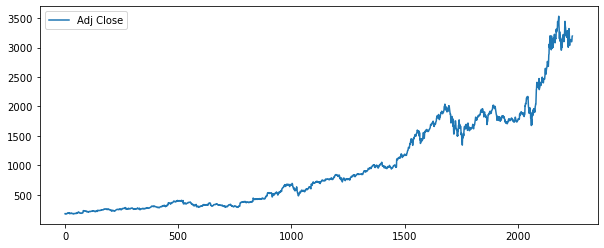

In [7]:
data['Adj Close'].plot(legend=True,figsize=(10,4))

In [8]:
data.tail()

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
2237,11/20/2020,yahoo,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,amazon
2238,11/23/2020,yahoo,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,amazon
2239,11/24/2020,yahoo,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,amazon
2240,11/25/2020,yahoo,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,amazon
2241,11/27/2020,yahoo,3211.260010,3216.189941,3190.050049,3195.340088,3195.340088,2392900,amazon


#### Also, we can use pandas.api.types.is_numeric_dtype to count the number of numerical and none-numerical variables 

In [9]:
from pandas.api.types import is_numeric_dtype
n=0
for c in data.columns:
    if is_numeric_dtype(data[c]): n+=1

print('numerical variables:', n, 'none-numerical variables:',len(data.columns)-n)


numerical variables: 6 none-numerical variables: 3


In [10]:
data.shape

(2242, 9)

- Total number of observations: **28900**
 - Total number of variables (columns): **47**
 - The number of numerical variables: **25**
 - The number none-numerical variables: **22**

## To find the variables having missing values and the number of rows including missing values, we use isnull and then sum as following:

In [11]:
data.isnull().sum()

Date         0
Source       0
Open         1
High         2
Low          0
Close        3
Adj Close    1
Volume       0
Stock        0
dtype: int64

## 2). Preparing data for analytics
- **Handling missing values**
- **Removing the properties that have abnormal price**
- **Removing all columns that have a constant value**
- **Replacing the column SALEDATE with the columns, SALEYEAR and SALEMONTH**
- **Transform the values of sale price, PRICE, into values represented in thousands**

### Handling missing values
The data has only 9 records that include missing values. Therefore, we can remove them without losing  a lot of information. After removing these records, our data will include **28891** records

In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

Date         0
Source       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Stock        0
dtype: int64

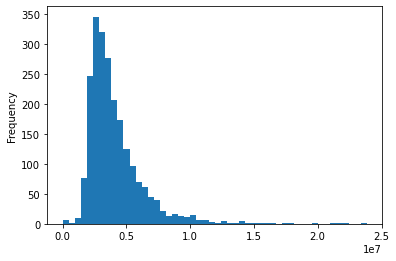

In [14]:
data['Volume'].plot(kind='hist',bins=50)

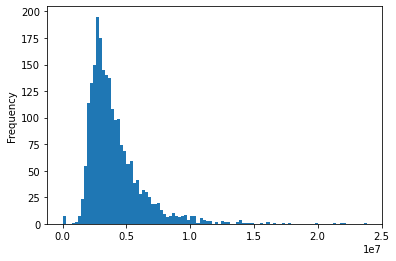

In [15]:
data['Volume'].plot(kind='hist',bins=100)

### Removing the properties that have abnormal price
First, we can have a look at the distribution of the properties price. The distribution of the sale price plotted below tell us that the majority of the properties in our data have a sale price that is less than \$1,250,000. However, it does not show us the abnnomal prices.

In [16]:
data['Volume'].min()

0

In [17]:
data['Volume'].max()

23856100

We can expect very expensive properties that because some properties are buildings with multiple units. However,  properties with very low prices deserve our attention. We remove the properties associated with exterime (price<\$10,000):
- Sorting the prices and display the lowest ones to see whether there are abnormal prices (very low prices)
- Plotting the number of rooms, full bed rooms, and bath rooms for the properties costing less than \$10,000
- Removing these properties

In [18]:
data['Volume'].sort_values(ascending=True).head(5)

29      0
114     1
18      5
161     6
47     23
Name: Volume, dtype: int64

In [19]:
# We remove the properties with exterime low prices (price <10,000)
data=data[data['Volume']>100000]
data.shape

(2228, 9)

In [20]:
data['Volume'].sort_values(ascending=True).head(5)

2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
Name: Volume, dtype: int64

In [21]:
#data['stock'] = 'amazon'

In [22]:
data.head()

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon


In [23]:
#data.to_csv('AMZN.csv')

### Removing all columns that have a constant value

In [24]:
constant_columns = []
for c in data.columns:
    n = len(data[c].unique())
    if n==1:constant_columns.append(c)

print('Constant Columns:', constant_columns)
data.drop(columns= constant_columns, axis=1, inplace=True)
print(data.shape)

Constant Columns: ['Source', 'Stock']
(2228, 7)


### Replacing the column Date with the columns, Year, Month, and Day


In [25]:
dateObject = pd.DatetimeIndex(data['Date'])
data['Year'] = dateObject.year
data['Month'] = dateObject.month
data['Day'] = dateObject.day
data[['Date', 'Year', 'Month', 'Day']].head()    

,Date,Year,Month,Day
0,1/3/2012,2012,1,3
1,1/4/2012,2012,1,4
2,1/5/2012,2012,1,5
3,1/6/2012,2012,1,6
4,1/9/2012,2012,1,9


In [26]:
data.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,2012,1,3
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,2012,1,4
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,2012,1,5
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,2012,1,6
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,2012,1,9
5,1/10/2012,181.100006,182.399994,177.100006,179.339996,179.339996,3985800,2012,1,10
6,1/11/2012,179.639999,180.770004,178.190002,178.899994,178.899994,3102700,2012,1,11
7,1/12/2012,179.419998,179.490005,175.750000,175.929993,175.929993,5385800,2012,1,12
8,1/13/2012,175.809998,178.800003,173.500000,178.419998,178.419998,4753500,2012,1,13
9,1/17/2012,180.149994,183.300003,178.509995,181.660004,181.660004,5644500,2012,1,17


In [27]:
# iqnore
#data.drop(columns=['SALEDATE'], axis=1, inplace=True)
#data.shape

### Transform the values of sale price, PRICE, into values represented in thousands

In [28]:
data[['Volume']]=data[['Volume']]/1000

In [29]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110.8,2012,1,3
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,2012,1,4
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809.1,2012,1,5
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008.4,2012,1,6
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,2012,1,9


## 3). Use visualization for data analysis
- 3.1. Show the trend of average Adj Close over years
- 3.2. Show the average sale-price over the months
- 3.3. Show the number of properties that have been sold over months
- 3.4. Show the average/sum of sale price for all 4 quadrant in Washington D.C.
- 3.5. Show the number of properties that have been sold in each of the 4 quandrant
- 3.6. Plot the average sale price over the number of fireplaces for properties that exist within NW and were sold in 2015
- 3.7. Show the average sale-price for each of the property grades
- 3.8. Is there any relation between neighborhood and sale price?

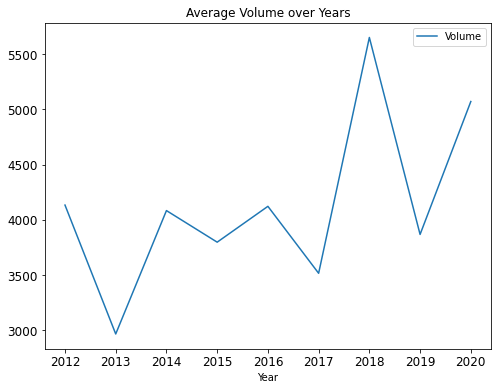

In [30]:
# 3.1. Show the trend of average Adj Close over years
data[['Year', 'Volume']].groupby('Year').mean().plot(figsize=(8,6),y= 'Volume', fontsize=12,title='Average Volume over Years')

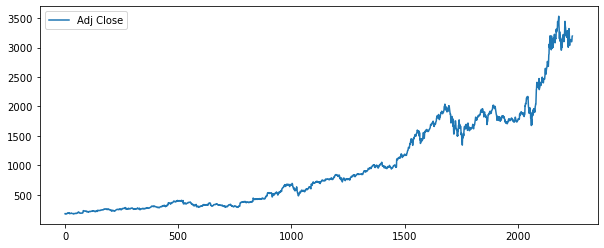

In [33]:
# Let's see a historical view of the closing price
data['Adj Close'].plot(legend=True,figsize=(10,4))

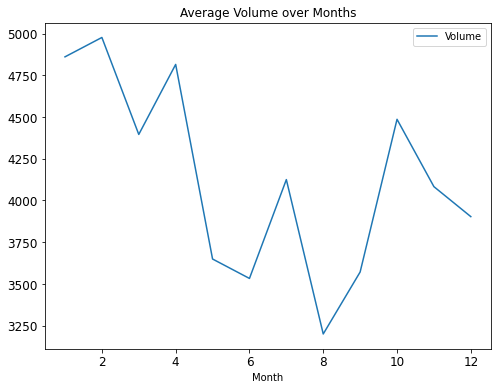

In [34]:
#3.2. Show the average volume over the months
# According to the figure below, June and Juli have the highest sale price average, while Janurary, March, and September have the lowest sale price average
data[['Month', 'Volume']].groupby('Month').mean().plot(figsize=(8,6),y= 'Volume', fontsize=12,title='Average Volume over Months')

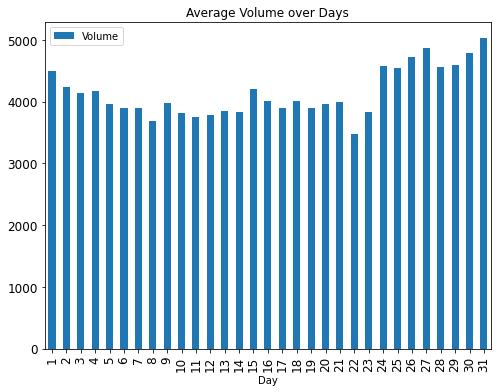

In [35]:
#3.2. Show the average volume over the days
# According to the figure below, June and Juli have the highest sale price average, while Janurary, March, and September have the lowest sale price average
data[['Day', 'Volume']].groupby('Day').mean().plot.bar(figsize=(8,6),y= 'Volume', fontsize=12,title='Average Volume over Days')

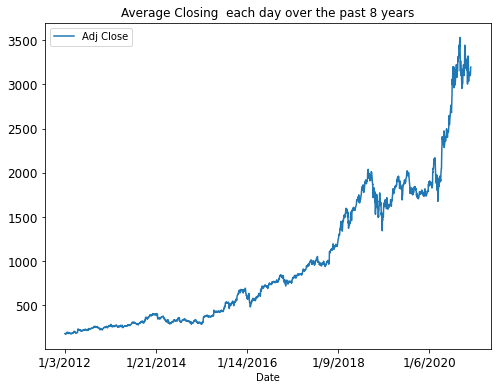

In [36]:
# 3.4. Show the average/sum of cloasing per day.
# According to the figure below, the northwest region has the highest sale price, and southwest region has the lowest sale price
data[['Date', 'Adj Close']].plot(figsize=(8,6), x = 'Date', y= 'Adj Close', fontsize=12,title='Average Closing  each day over the past 8 years')

In [37]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2228 non-null   datetime64[ns]
 1   Open       2228 non-null   float64       
 2   High       2228 non-null   float64       
 3   Low        2228 non-null   float64       
 4   Close      2228 non-null   float64       
 5   Adj Close  2228 non-null   float64       
 6   Volume     2228 non-null   float64       
 7   Year       2228 non-null   int64         
 8   Month      2228 non-null   int64         
 9   Day        2228 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 191.5 KB


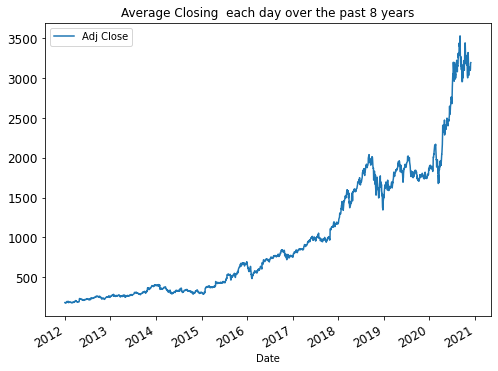

In [39]:
# According to the figure below, the northwest region has the highest sale price, and southwest region has the lowest sale price
data[['Date', 'Adj Close']].plot(figsize=(8,6), x = 'Date', y= 'Adj Close', fontsize=12,title='Average Closing  each day over the past 8 years')

Text(0.5, 0, 'Month')

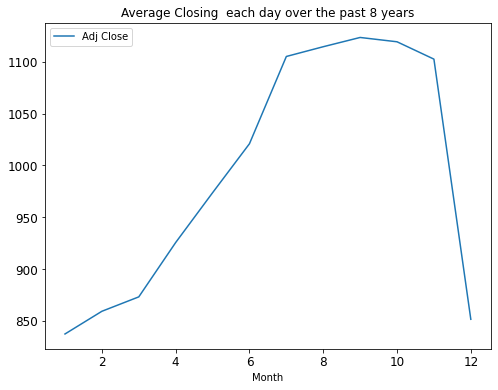

In [40]:
data[['Date', 'Adj Close']].groupby(data['Date'].dt.month).mean().plot(figsize=(8,6), y= 'Adj Close', fontsize=12,title='Average Closing  each day over the past 8 years')
plt.xlabel('Month')

In [41]:
filter1 =data['Year']>2015
filter2 =data[data['Adj Close'] < data['Open']]
filter2


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,2012,1,4
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,2012,1,9
5,2012-01-10,181.100006,182.399994,177.100006,179.339996,179.339996,3985.8,2012,1,10
6,2012-01-11,179.639999,180.770004,178.190002,178.899994,178.899994,3102.7,2012,1,11
7,2012-01-12,179.419998,179.490005,175.750000,175.929993,175.929993,5385.8,2012,1,12
...,...,...,...,...,...,...,...,...,...,...
2234,2020-11-17,3183.540039,3189.250000,3135.260010,3135.659912,3135.659912,3444.7,2020,11,17
2235,2020-11-18,3134.000000,3140.000000,3105.100098,3105.459961,3105.459961,2916.8,2020,11,18
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,2020,11,20
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,2020,11,23


In [42]:
filter1

0       False
1       False
2       False
3       False
4       False
        ...  
2237     True
2238     True
2239     True
2240     True
2241     True
Name: Year, Length: 2228, dtype: bool

Text(0, 0.5, 'Number of Stocks')

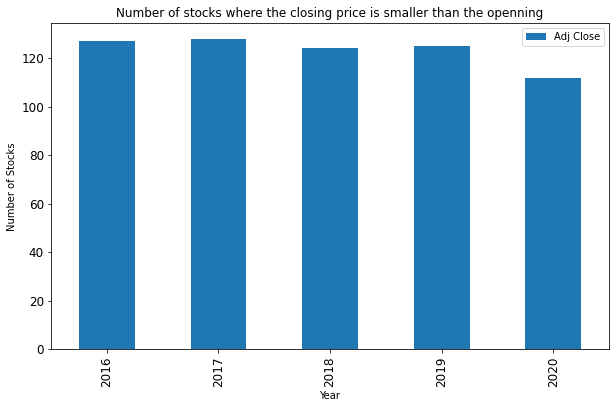

In [43]:
filter1 =data['Year']>2015
filter2 =data['Adj Close'] < data['Open']
result=data[filter1 & filter2]
result[['Year', 'Adj Close']].groupby('Year').count().plot.bar(figsize=(10,6), y= 'Adj Close', fontsize=12, legend=True, 
                                                               title='Number of stocks where the closing price is smaller than the openning')

plt.ylabel("Number of Stocks")

Text(0, 0.5, 'Number of Stocks')

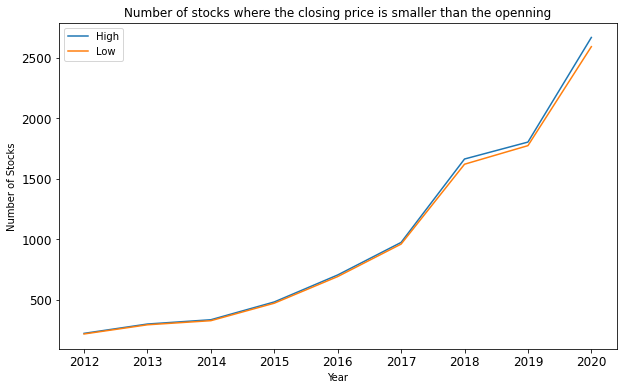

In [44]:
# compare the high and low
data[['Year', 'High','Low']].groupby('Year').mean().plot(figsize=(10,6), y= ['High','Low'], fontsize=12, legend=True, 
                                                               title='Number of stocks where the closing price is smaller than the openning')

plt.ylabel("Number of Stocks")

Text(0, 0.5, 'Number of Stocks')

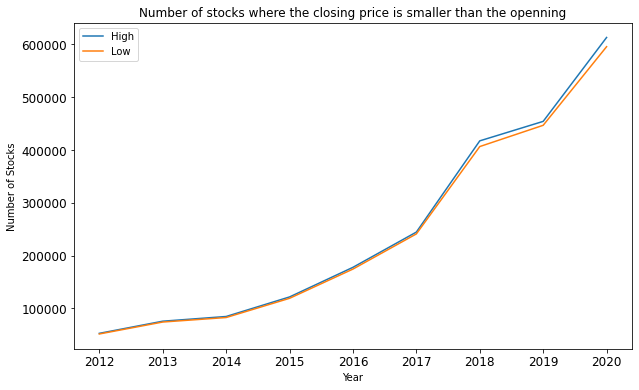

In [45]:
# compare the high and low
data[['Year', 'High','Low']].groupby('Year').sum().plot(figsize=(10,6), y= ['High','Low'], fontsize=12, legend=True, 
                                                               title='Number of stocks where the closing price is smaller than the openning')

plt.ylabel("Number of Stocks")

Text(0, 0.5, 'Average Price of Stocks')

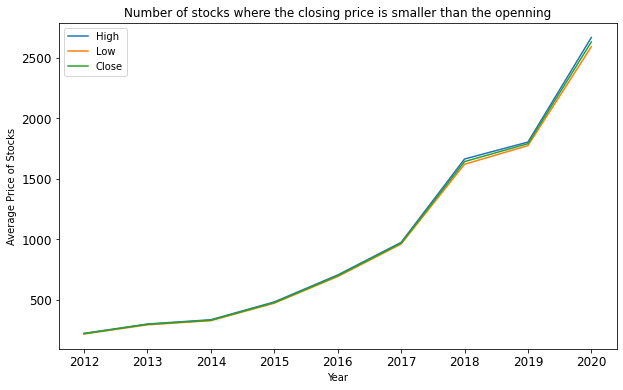

In [46]:
# compare the high and low
data[['Year', 'High','Low','Close']].groupby('Year').mean().plot(figsize=(10,6), y= ['High','Low','Close'], fontsize=12, legend=True, 
                                                               title='Number of stocks where the closing price is smaller than the openning')

plt.ylabel("Average Price of Stocks")

Text(0, 0.5, 'Average Price of Stocks')

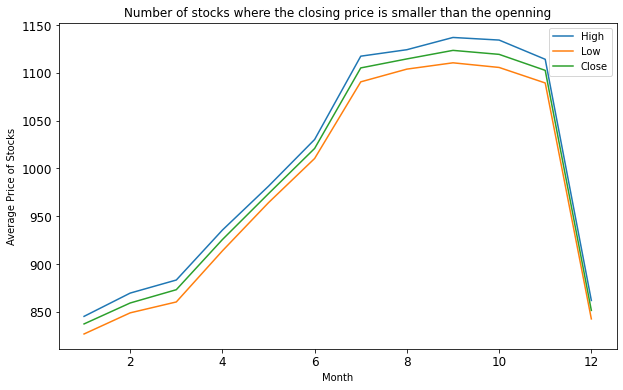

In [47]:
# compare the high and low
data[['Month', 'High','Low','Close']].groupby('Month').mean().plot(figsize=(10,6), y= ['High','Low','Close'], fontsize=12, legend=True, 
                                                               title='Number of stocks where the closing price is smaller than the openning')

plt.ylabel("Average Price of Stocks")

Text(0, 0.5, 'Average Price of Stocks')

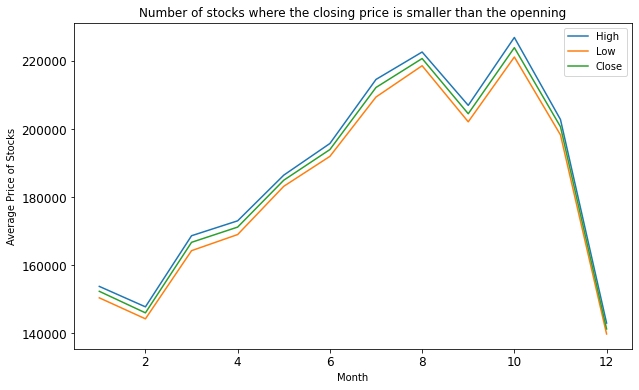

In [48]:
# compare the high and low
data[['Month', 'High','Low','Close']].groupby('Month').sum().plot(figsize=(10,6), y= ['High','Low','Close'], fontsize=12, legend=True, 
                                                               title='Number of stocks where the closing price is smaller than the openning')

plt.ylabel("Average Price of Stocks")

Text(0, 0.5, 'Average Price of Stocks')

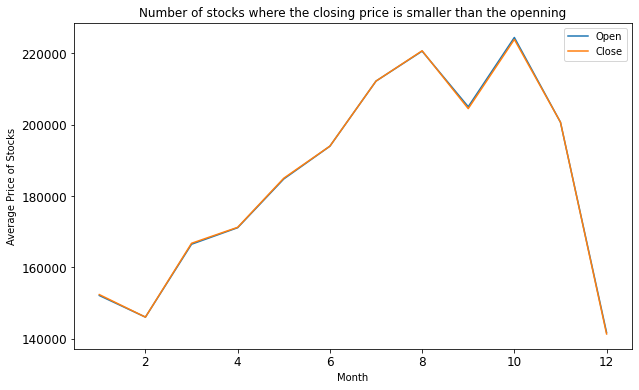

In [49]:
# compare the high and low
data[['Month', 'Open','Close']].groupby('Month').sum().plot(figsize=(10,6), y= ['Open','Close'], fontsize=12, legend=True, 
                                                               title='Number of stocks where the closing price is smaller than the openning')

plt.ylabel("Average Price of Stocks")

Text(0, 0.5, 'Average Price of Stocks')

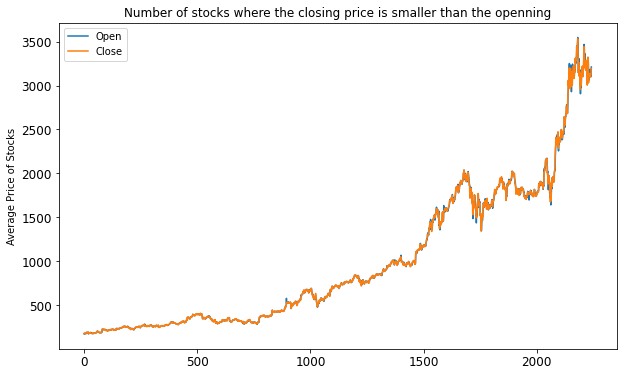

In [50]:
# compare the high and low
data[['Date', 'Open','Close']].plot(figsize=(10,6), y= ['Open','Close'], fontsize=12, legend=True, 
                                                               title='Number of stocks where the closing price is smaller than the openning')

plt.ylabel("Average Price of Stocks")

In [51]:
data['Open'].mean() - data['Adj Close'].mean()

0.21198426929993275

## 4). Query the data to answer the following questions
- 4.1.	Find the zip-code that has the highest and lowest number of sales
- 4.2.	Find the quadrant that has the highest and lowest average sale price
- 4.3.	Find the zip-code and its quadrant for the highest and lowest average sale-price
- 4.4.  Show the price, zip-code, quadrant, the number of stories, structural grade, and property condition for the most expensive property

In [52]:
# Find the month that has the highest and lowest number of volume
r = data[['Month',  'Volume']].groupby(['Month']).sum()

print('The  Month with the lowest volume:', r.idxmin()[0], 'Volume', r.min()[0] * 1000)
print('The  Month with the highest volume:', r.idxmax()[0], ' Volume', r.max()[0] * 1000)

The  Month with the lowest volume: 8 Volume 633655399.9999995
The  Month with the highest volume: 10  Volume 897270199.9999995


In [53]:
# Find the month that has the highest and lowest number of volume
r = data['Volume']
s=r.idxmin()
x=r.idxmax()
print('The  Day with the lowest volume:', data.iloc[r.idxmin()]['Date'].date(), 'Volume', data.iloc[r.idxmin()]['Volume'])
print('The  Day with the highest volume:', data.iloc[r.idxmax()]['Date'].date(), ' Volume', data.iloc[r.idxmax()]['Volume'])


The  Day with the lowest volume: 2020-01-15 Volume 2896.6
The  Day with the highest volume: 2015-02-20  Volume 3258.0


In [54]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110.8,2012,1,3
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,2012,1,4
2,2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809.1,2012,1,5
3,2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008.4,2012,1,6
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,2012,1,9
...,...,...,...,...,...,...,...,...,...,...
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,2020,11,20
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,2020,11,23
2239,2020-11-24,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602.1,2020,11,24
2240,2020-11-25,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790.4,2020,11,25


In [55]:
#4.3. Find the month and day that has the lwest closing price!
r = data[['Month', 'Day',  'Close']].groupby(['Month', 'Day']).mean()

r.idxmin()[0]
r.min()[0]


366.105011

In [56]:
#4.4. Show the price, zip-code, quadrant, the number of stories, structural grade, and property condition for the most expensive property

r = data.loc[data['Close'].idxmax()]
print('Closing: ', f"{r['Close']:,}", '\nOpen:', r['Open'],  '\nYear:', r['Year'], '\nMonth:', r['Month'],  '\nDay:', r['Day'], '\nVolume:', r['Volume']*1000)



Closing:  3,531.4499509999996 
Open: 3547.0 
Year: 2020 
Month: 9 
Day: 2 
Volume: 3931500.0
